# Complex Intersection Consolidation

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

ImportError: cannot import name 'CRS' from 'pyproj' (/Users/eudald/opt/miniconda3/envs/iper/lib/python3.8/site-packages/pyproj/__init__.py)

Complete graph for driving.

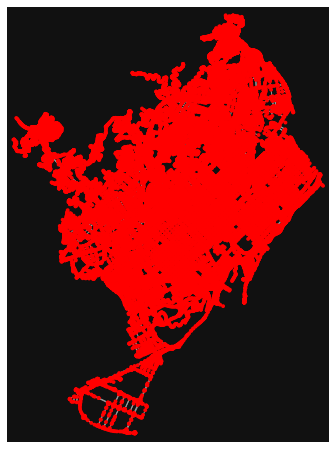

In [12]:
G_drive_complex = ox.graph_from_place('Barcelona, Spain', network_type = 'drive',simplify = False)
fig, ax = ox.plot_graph(G_drive_complex, node_color= 'r')

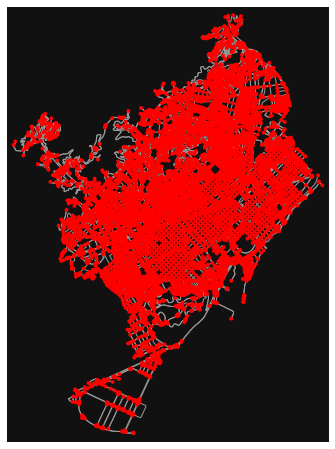

In [13]:
G_drive = ox.graph_from_place('Barcelona, Spain', network_type = 'drive')
fig, ax = ox.plot_graph(G_drive, node_color = 'r')

In [14]:
# Consolidate intersections which have more than one node with in 15 m
intersections = ox.consolidate_intersections(G_drive_proj, rebuild_graph=False, tolerance=15, dead_ends=False)

In [15]:
print(len(intersections))
print(len(G_drive))

5856
8810


In [17]:
# To apply that into our graph we must set the variable rebuild_graph to True
G_drive_simplified = ox.consolidate_intersections(G_drive_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G_drive_simplified)

5960

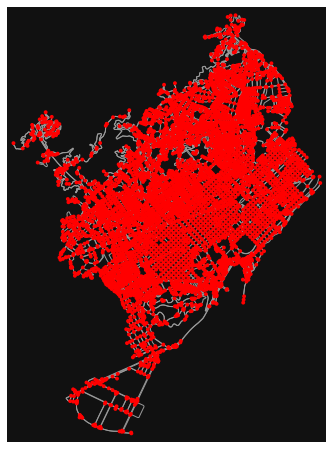

In [18]:
fig, ax = ox.plot_graph(G_drive_simplified, node_color='r')

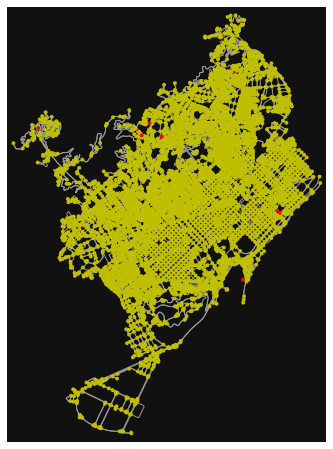

In [21]:
# plot the simplified network and highlight any self-loop edges
loops = [edge[0] for edge in nx.selfloop_edges(G_drive_simplified)]
nc = ['r' if node in loops else 'y' for node in G_drive_simplified.nodes()]
fig, ax = ox.plot_graph(G_drive_simplified, node_color=nc)

## Same Process in a zoomed area

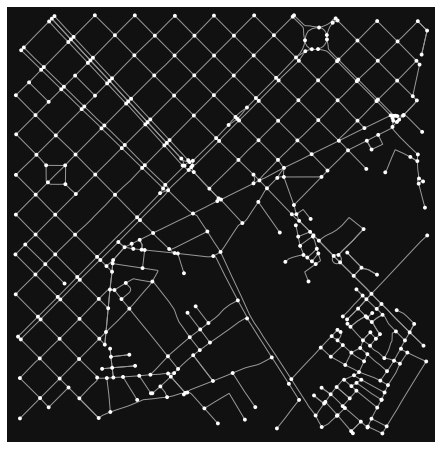

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
G_zoom_drive = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 1000, network_type = 'drive')
ox.plot_graph(G_zoom_drive)

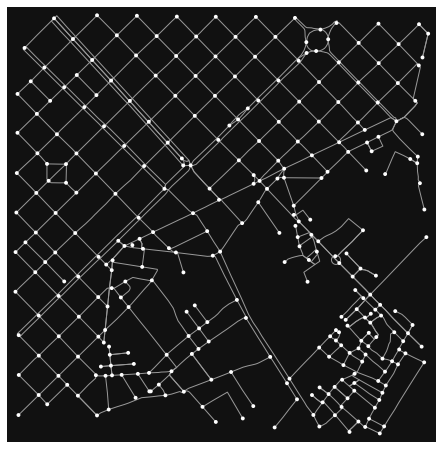

In [155]:
# Simplify the graph
G_zoom_drive_simp = ox.consolidate_intersections(ox.project_graph(G_zoom_drive), rebuild_graph=True, tolerance=15, dead_ends=True)
ax, fig = ox.plot_graph(G_zoom_drive_simp)


In [156]:
print(len(G_zoom_drive.edges))
print(len(G_zoom_drive_simp.edges))

694
577


In [174]:
intersections = ox.consolidate_intersections(ox.project_graph(G_zoom_drive), rebuild_graph=False, tolerance=15, dead_ends=False)
intersections

0      POINT (431378.121 4581043.835)
1      POINT (431229.287 4581056.005)
2      POINT (431398.827 4581077.447)
3      POINT (429651.768 4581131.701)
4      POINT (431163.702 4581130.833)
                    ...              
271    POINT (430609.959 4582160.248)
272    POINT (429737.032 4582192.964)
273    POINT (430115.108 4582188.808)
274    POINT (429928.422 4582194.209)
275    POINT (430349.249 4582212.443)
Length: 276, dtype: geometry

## Try to perform routes

241
143


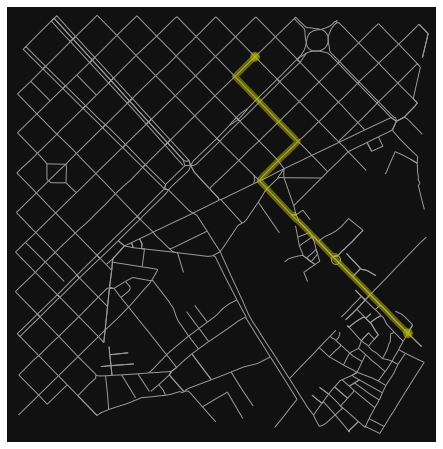

In [163]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G_zoom_drive_simp)[randint(0,len(G_zoom_drive_simp))]
dest = list(G_zoom_drive_simp)[randint(0,len(G_zoom_drive_simp))]
print(orig)
print(dest)
try:
    route = ox.shortest_path(G_zoom_drive_simp, orig,dest, weight='length')
    fig, ax = ox.plot_graph_route(G_zoom_drive_simp, route, route_color='y', route_linewidth=6, node_size=0)
except:
    print("no path to", dest)
    # Try to get the closest node 
    